# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 11. Data Visualization (part 1)

### Date: September 29, 2020

### To-Dos From Last Class:

* Work on Assignment #3
* Install R
    
### Today:

* RStudio (.R, .Rmd)
* Tidyverse & ggplot
    * For additional reading, see <a href='https://r4ds.had.co.nz/'>R for Data Science</a> and <a href="https://www.moderndive.com/">Statistical Inference via Data Science</a>
* Play around with a sample dataset

### Homework

* Assignment #3
    * Due 10/1

# RStudio

* R is a language, RStudio is an IDE

<img src='img/r_vs_rstudio.png' width='600'>

## Rmarkdown

* .R files --> Basic R scripts written and executed in RStudio
* .Rmd files --> RMarkdown files merging markdown and code chunks (similar to Jupyter)

# What is `tidyverse`?

## Definition

* Set of R packages
    * Includes ggplot, dplyr, tidyr, etc.
* All packages share an underlying design philosophy, grammar, and data structures.
    * <a href="https://www.tidyverse.org">For more info</a>
    
## Why do I use it?

* ggplot
* Most of the inferential modeling I do is in R
    * Nearly all of these modeling functions play nicely with tidy data frames


# Wading into the tidyverse...

## Reading in and interpreting a simple dataset

* Dataset contains the body mass index (BMI) of 1786 people, together with the number of steps each of them took on a particular day.
* Stored in two files: one for men, one for women.

## Step #1:
* Reading in the data
    * Coding biological sex as a variable
    * Merging the data frames

In [33]:
# loading the tidyverse
library(tidyverse)

In [34]:
# Setting up our file paths and file names

#  paths
data_dir <- '/Users/jeremyhogeveen/Dropbox/Fall_2020/teaching/DSPN_Fall2020_git/misc_exercises/data_visualization_session1'

# filename
female_data <- paste(data_dir,'data9b_w.txt',sep='/')
male_data <- paste(data_dir,'data9b_m.txt',sep='/')

In [35]:
# Reading in the data and merging into a single DF

# reading in the data
# fem_df <- read_tsv(female_data)
# fem_df <- mutate(fem_df,Sex=2)

# more efficient / easier to read way to code in R: Pipes
fem_df <- read_tsv(female_data) %>% # Can string tidyverse functions together in a chain
    mutate(Sex = 2)
male_df <- read_tsv(male_data) %>%
    mutate(Sex = 1)
    
#merging the male and female data together
df <- bind_rows(fem_df,male_df) # tidyverse has a merge function similar to pd, but in this case we're not merging given the two datasets contain independent observations

Parsed with column specification:
cols(
  ID = col_integer(),
  steps = col_integer(),
  bmi = col_double()
)

Parsed with column specification:
cols(
  ID = col_integer(),
  steps = col_integer(),
  bmi = col_double()
)



## Step #2:
* Testing whether there is a statistically significant difference in the average number of steps taken by men and women
    * Run a t-test
    * Plot in a boxplot


	Welch Two Sample t-test

data:  steps by Sex
t = 6.8441, df = 1778, p-value = 1.055e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  800.9513 1444.3903
sample estimates:
mean in group 1 mean in group 2 
       8013.908        6891.237 

[1] "Hypothesis #1 --> Supported by the data"


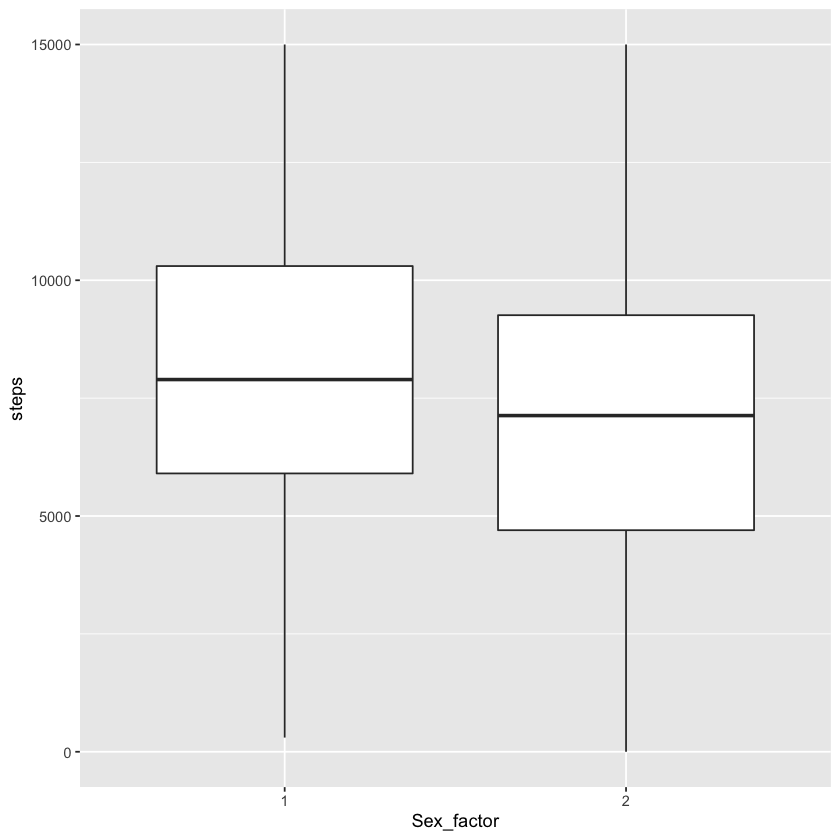

In [38]:
# hypothesis #1:
print(mod_hyp1 <- t.test(steps~Sex,df))

# making sure R knows the sex var is a factor
# useful for plotting in ggplot
df <- df %>%
    mutate(Sex_factor = as.factor(Sex))

# plotting the data in a scatterplot by group
plot(plot_bmidata_sexBoxplot <- ggplot(df,aes(x = Sex_factor, y = steps)) + geom_boxplot())

# therefore...
print('Hypothesis #1 --> Supported by the data')

## Step #3:
* Testing that there is a negative correlation between the number of steps and the BMI for women
    * Run a cor test

In [40]:
# hypothesis #2: 
print(mod_hyp2 <- cor.test(fem_df$steps,fem_df$bmi))
print('Hypothesis #2 --> Supported by the data')


	Pearson's product-moment correlation

data:  fem_df$steps and fem_df$bmi
t = -9.968, df = 919, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3695032 -0.2528646
sample estimates:
       cor 
-0.3123607 

[1] "Hypothesis #2 --> Supported by the data"


## Step #4:
* Testing that the negative correlation between steps and BMI is positive for men
    * Run a cor test

In [41]:
# hypothesis #3: 
print(mod_hyp3 <- cor.test(male_df$steps,male_df$bmi))
print('Hypothesis #3 --> NOT supported by the data')


	Pearson's product-moment correlation

data:  male_df$steps and male_df$bmi
t = -6.9541, df = 863, p-value = 7.006e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2925195 -0.1662485
sample estimates:
       cor 
-0.2303534 

[1] "Hypothesis #3 --> NOT supported by the data"


# Step #5:

* Visualizing the data

`geom_smooth()` using formula 'y ~ x'



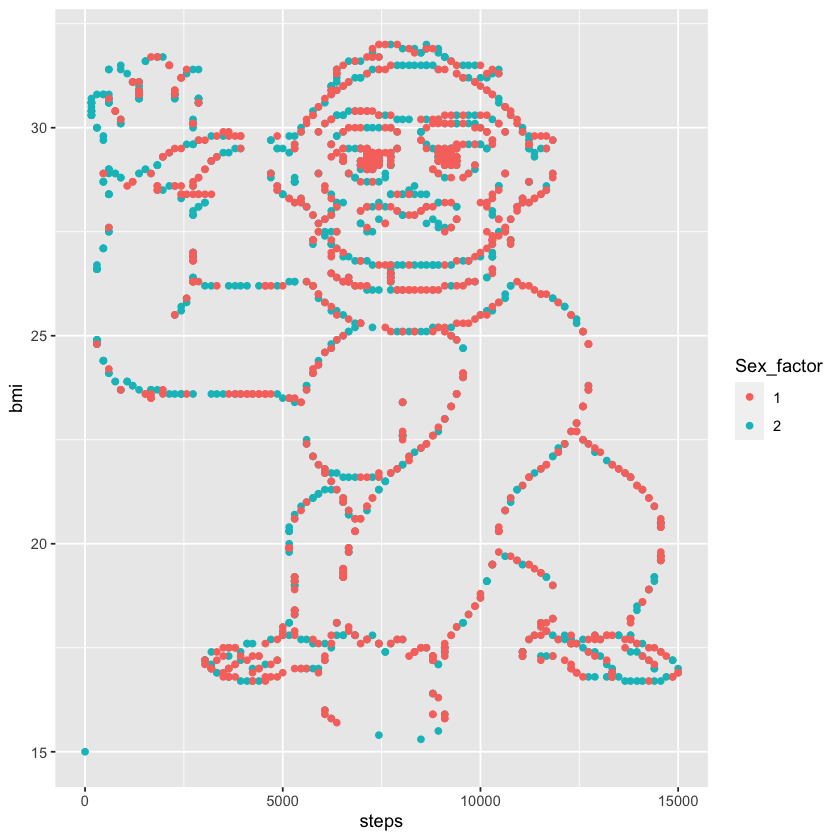

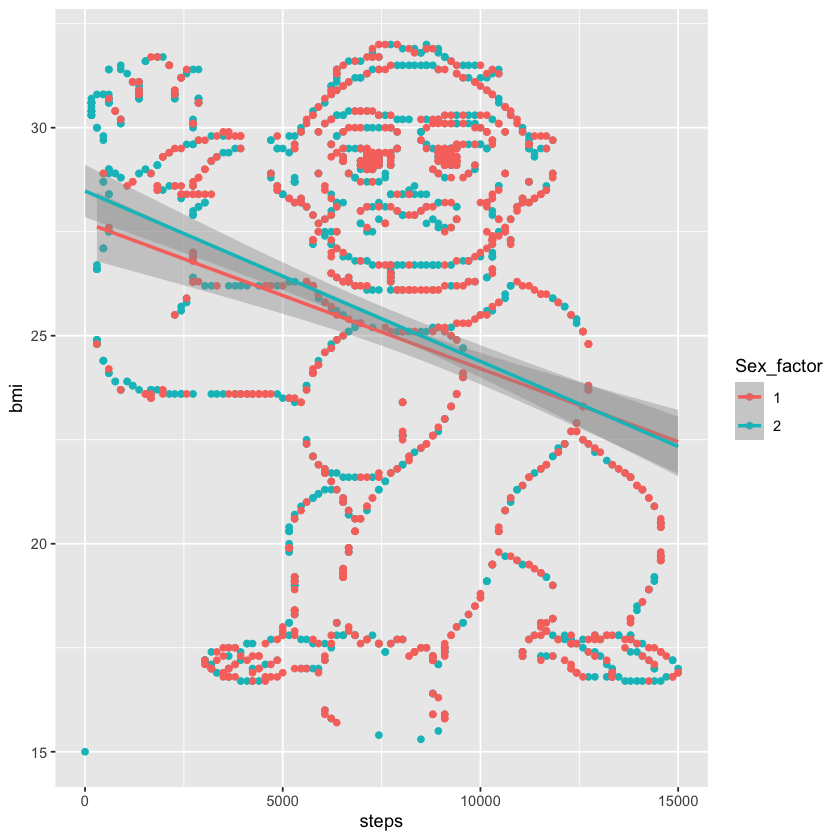

In [44]:
# plotting the data in a scatterplot by group
plot(plot_bmidata_scatter <- ggplot(df,aes(x = steps, y = bmi, color = Sex_factor)) + geom_point())

plot(plot_bmidata_scatter_wlines <- ggplot(df,aes(x = steps, y = bmi, color = Sex_factor)) + geom_point() + geom_smooth(method=lm))

# Lesson: Step #5 should've been Step #1

# Example courtesy:

* Yanai, I., & Lercher, M. (2020). <a href='https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w'>A hypothesis is a liability.</a>